In [1]:
import pandas_profiling
import time
import random

import numpy as np
import pandas as pd

from IPython.display import Image

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,cross_validate,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from subprocess import call

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


## Loading

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualization

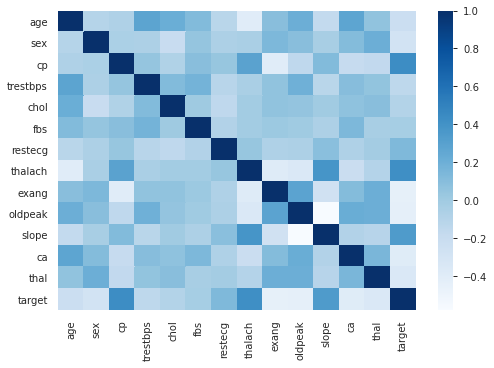

In [4]:
sns.heatmap(df.corr(), cmap='Blues')

## Pre-processing

In [5]:
X = df.drop(['target'],axis=1)
y = df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
indep_scaler = StandardScaler()
X_train = indep_scaler.fit_transform(X_train)
X_test = indep_scaler.transform(X_test)

In [9]:
relatable_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']
relatable_columns_index = [3, 4, 7, 9]

colors = ["skyblue", "olive", "gold", "teal"]


1. For trestbps(3)
Kurtosis: 0.868480

2. For chol(4)
Kurtosis: 5.021364

3. For thalach(7)
Kurtosis: -0.192030

4. For oldpeak(9)
Kurtosis: 1.146011


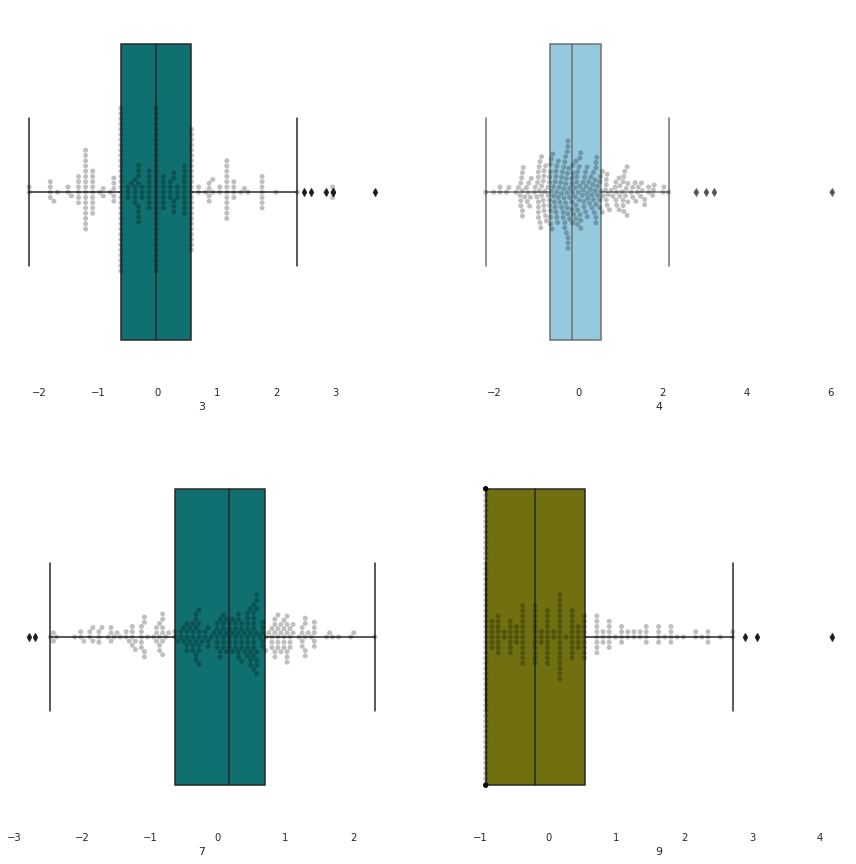

In [10]:
f, axes = plt.subplots(2, 2, figsize=(15, 15)) 
# sharex=True => if I use this parameter, then x- or y-axis will be shared among all subplots.

for index, each_column_index in enumerate(relatable_columns_index):
    print('\n{}. For {}({})'.format(index+1, df.columns[each_column_index], each_column_index))
    print("Kurtosis: %f" % pd.DataFrame(X_train)[each_column_index].kurt())
    sns.set(style="whitegrid")
    sns.boxplot(pd.DataFrame(X_train)[each_column_index],
                color=random.choice(colors), ax=axes[index//2, index%2])
    sns.swarmplot(pd.DataFrame(X_train)[each_column_index],color='black',alpha=0.25,
                 ax=axes[index//2, index%2])


1. For trestbps(3)
Skewness: 0.669584

2. For chol(4)
Skewness: 1.284200

3. For thalach(7)
Skewness: -0.513457

4. For oldpeak(9)
Skewness: 1.182153


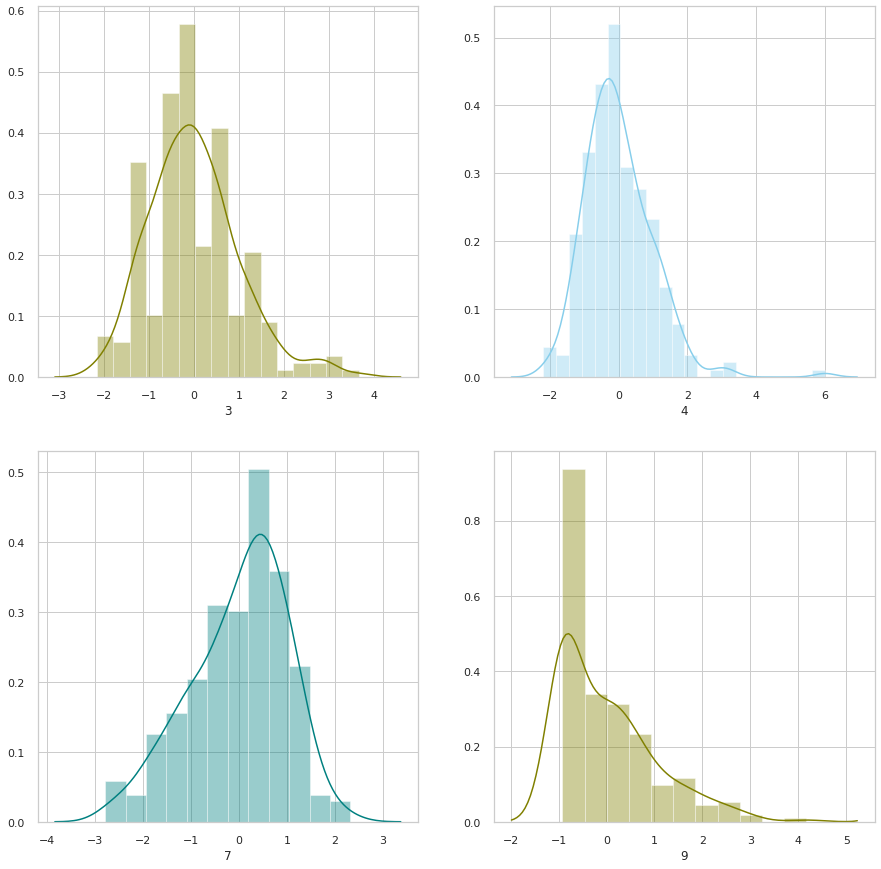

In [11]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

for index, each_column_index in enumerate(relatable_columns_index):
    print('\n{}. For {}({})'.format(index+1, df.columns[each_column_index], each_column_index))
    print("Skewness: %f" % pd.DataFrame(X_train)[each_column_index].skew())
    sns.distplot( pd.DataFrame(X_train)[each_column_index] , color=random.choice(colors), ax=axes[index//2, index%2])

## Model Building

In [12]:
kfolds = 4 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]
for name,model in base_models:
    clf = model
    cv_results = cross_val_score(clf, 
                                 X_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.7395 +/- 0.0635 (std) min: 0.6333, max: 0.8
RF_model cross validation accuarcy score: 0.8016 +/- 0.0232 (std) min: 0.7705, max: 0.8361
LR_model cross validation accuarcy score: 0.8057 +/- 0.0191 (std) min: 0.7833, max: 0.8361
XGB_model cross validation accuarcy score: 0.8057 +/- 0.0249 (std) min: 0.7667, max: 0.8333


### Random Forest

In [13]:
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train,y_train)

s = np.mean(cross_val_score(rf,X_train,y_train,scoring='roc_auc',cv=5))
print('The accuracy score for RandomForest is: ', s*100)

The accuracy score for RandomForest is:  91.15446282112948


### Logistic Regression

In [14]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

s = np.mean(cross_val_score(lr,X_train,y_train,scoring='roc_auc',cv=5))
print('The accuracy score for RandomForest is: ', s*100)

The accuracy score for RandomForest is:  88.52820019486686


## Final Model Building

In [15]:
final_model = RandomForestClassifier(n_estimators=60, random_state=9, 
                                     criterion='gini', max_features='sqrt',
                                    max_samples=9)
final_model.fit(X_train,y_train)

s = np.mean(cross_val_score(final_model,X_train,y_train,scoring='roc_auc',cv=5))
print('The accuracy score for RandomForest is: ', s*100)

predictions = final_model.predict(X_test)
print('Testing Accuracy: ', accuracy_score(y_test,predictions))

The accuracy score for RandomForest is:  88.9558281224948
Testing Accuracy:  0.8852459016393442


## Output Summary

Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Training Accuracy : 0.8347107438016529
Testing Accuracy : 0.8852459016393442
Sensitivity :  0.8928571428571429
Specificity :  0.8787878787878788
The AUC Score:  0.8841594827586207


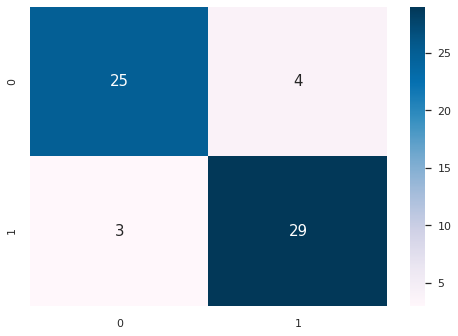

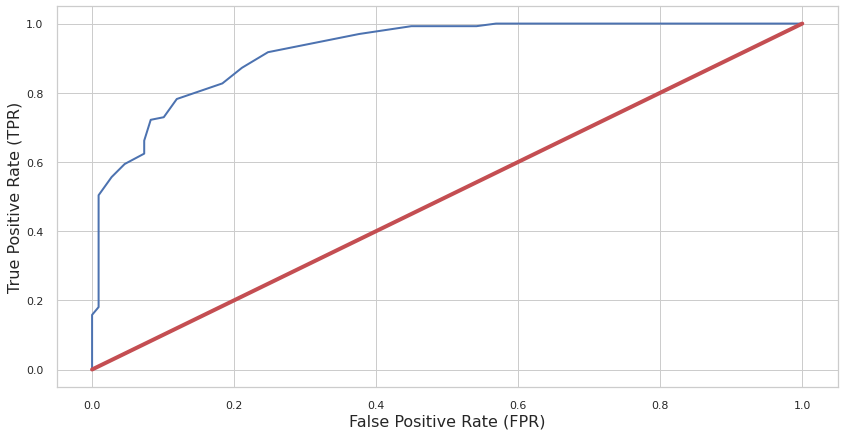

In [16]:
# Classification Report
print('Classification Report :')
print(classification_report(y_test,predictions))

# Traing & Testing Accuracy
print("Training Accuracy :", final_model.score(X_train, y_train))
print("Testing Accuracy :", final_model.score(X_test, y_test))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# Sensitivity & Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

# ROC-AUC Curve Generating
print('The AUC Score: ',roc_auc_score(y_test, predictions))

y_scores = final_model.predict_proba(X_train)
y_scores = y_scores[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([-0.05, 1.05, -0.05, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()